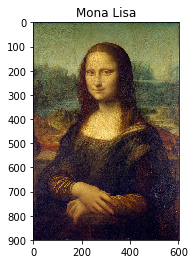

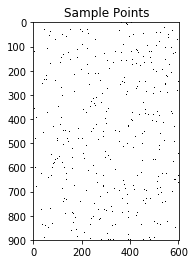

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Load image
# Return numpy array of MxNx3
img = plt.imread('mona-lisa-small.jpg')
M, N = img.shape[0], img.shape[1]
plt.title("Mona Lisa")
plt.imshow(img)
plt.show()

    
# Randomly select samples
sample_size = 5000
coords = []
pixels = []
x_idx = np.random.choice(M, sample_size)
y_idx = np.random.choice(N, sample_size)


# Regress all three values and map (x,y) coordinates to (r,g,b) values
for i in range(sample_size):
    coords.append([x_idx[i], y_idx[i]])
    pixels.append(img[x_idx[i], y_idx[i]])
# Rescale pixel intensities
pixels = [pix / 255 for pix in pixels]


# display sample points
sample_pts = np.zeros([M,N,3], dtype=np.uint8)
sample_pts.fill(255)
for i in range(sample_size): 
    sample_pts[x_idx[i], y_idx[i]] = pixels[i] 
plt.imshow(sample_pts)
plt.title("Sample Points")
plt.show()

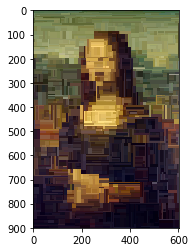

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def run_RFR(n_trees, depth):
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=depth)
    rf.fit(coords, pixels)
    pred = np.zeros([M,N,3])
    for i in range(M):
        for j in range(N):
            pred[i,j] = rf.predict(np.array([i,j]).reshape(1,-1))
    plt.imshow(pred)
    plt.show()
    
run_RFR(1, None)

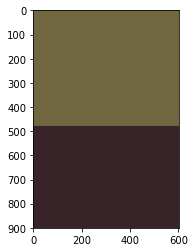

In [ ]:
# Single decision tree with depths 1, 2, 3, 5, 10, and 15.
run_RFR(1, 1)
run_RFR(1, 2)
run_RFR(1, 3)
run_RFR(1, 5)
run_RFR(1, 10)
run_RFR(1, 15)

In [ ]:
# tree depth 7 with tree number 1, 3, 5, 10, and 100
run_RFR(1, 7)
run_RFR(3, 7)
run_RFR(5, 7)
run_RFR(10, 7)
run_RFR(100, 7)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def run_KNR():
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(coords, pixels)
    pred = np.zeros([M,N,3])
    for i in range(M):
        for j in range(N):
            pred[i,j] = knn.predict(np.array([i,j]).reshape(1,-1))
    plt.imshow(pred)
    plt.show()

run_KNR()
